In [1]:
%%capture
#from re import sub
from sys import path
path.insert(0, '../static')
from agyw import AgywPrev

#from src.static.agyw import AgywPrev


from pandas import DataFrame, read_excel
from datetime import datetime, timedelta
from enum import Enum
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [2]:
current_Date = datetime.today()
previous_Date = datetime.today() - timedelta(days=1)



class Monitoring_date(Enum):
   previous = previous_Date.strftime("%d_%m_%Y")
   current = current_Date.strftime("%d_%m_%Y")
   
   

In [3]:
%%capture
datim = AgywPrev()

In [4]:
datim.total_datim_general

18096

In [6]:
inception_data = read_excel(f"./monitoring_results/monitoring_du_24_09_2021.xlsx")
past_data = read_excel(f"./monitoring_results/monitoring_du_{Monitoring_date.previous.value}.xlsx")
performant_solution = DataFrame.from_dict({f"datim_{Monitoring_date.current.value}":[datim.total_datim_general],
                    f"datim_{Monitoring_date.previous.value}": past_data[f"datim_{Monitoring_date.previous.value}"].values.tolist(),
                    "Evolution de l'indicateur": [datim.total_datim_general - past_data[f"datim_{Monitoring_date.previous.value}"].values.tolist()[0]],
                    "Evolution since inception of control": [datim.total_datim_general - inception_data['datim_23_09_2021'].values.tolist()[0]]                    
},orient="columns")

performant_solution.to_excel(f"./monitoring_results/monitoring_du_{Monitoring_date.current.value}.xlsx",index=False)
performant_solution

,datim_10_10_2021,datim_09_10_2021,Evolution de l'indicateur,Evolution since inception of control
0,18096,18097,-1,5251


In [7]:
inception_data[['datim_23_09_2021']]

,datim_23_09_2021
0,12845


<Figure size 1152x576 with 0 Axes>

Text(0.5, 0, '')

Text(0, 0.5, '')

Text(0.5, 0.98, 'AGYW, monitoring for FY21')

Text(18098.0, 0.0, '18096')

Text(18099.0, 1.0, '18097')

Text(1.0, 2.0, '-1')

Text(5253.0, 3.0, '5251')

Text(-80, -20, 'source: HIVHaiti')

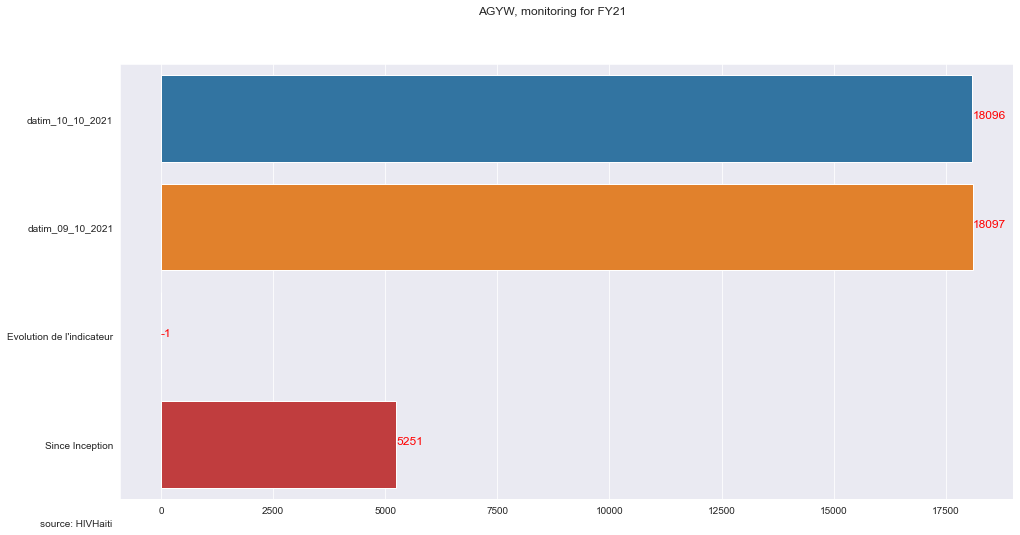

In [8]:
data_plot = DataFrame({"state":[f"datim_{Monitoring_date.current.value}",f"datim_{Monitoring_date.previous.value}","Evolution de l'indicateur", "Since Inception"],
                            "data": [datim.total_datim_general,past_data[f"datim_{Monitoring_date.previous.value}"].values.tolist()[0],datim.total_datim_general - past_data[f"datim_{Monitoring_date.previous.value}"].values.tolist()[0], datim.total_datim_general - inception_data['datim_23_09_2021'].values.tolist()[0] ]                        
})


plt.figure(figsize=(16,8))
sns.set_style("darkgrid")
splot = sns.barplot(x="data",y="state",data=data_plot)
splot.set_xlabel("")
splot.set_ylabel("")
plt.suptitle("AGYW, monitoring for FY21")
for p in splot.patches:
    width = p.get_width()
    plt.text(2+p.get_width(), p.get_y()+0.50*p.get_height(),
             '{:1.0f}'.format(width), fontdict=dict(color="red",fontsize=12))
    
plt.annotate(
    "source: HIVHaiti",(0,0), (-80,-20), fontsize=10, 
             xycoords='axes fraction', textcoords='offset points', va='top'
)

plt.savefig("monitoring_indicator",dpi=400)